In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: count, dtype: int64

In [6]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

In [8]:
# for plotting histograph
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize=(20, 15))

## Train Test Splitting

In [9]:
# import numpy as np

# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)* test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print (f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing , test_size = 0.2, random_state = 42)
print (f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 331
Rows in test set: 83


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['X4 number of convenience stores']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
housing = strat_train_set.copy()

## looking for coorelation

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X6 longitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X5 latitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X6 longitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X5 latitude'>,
        <Axes: xlabel=

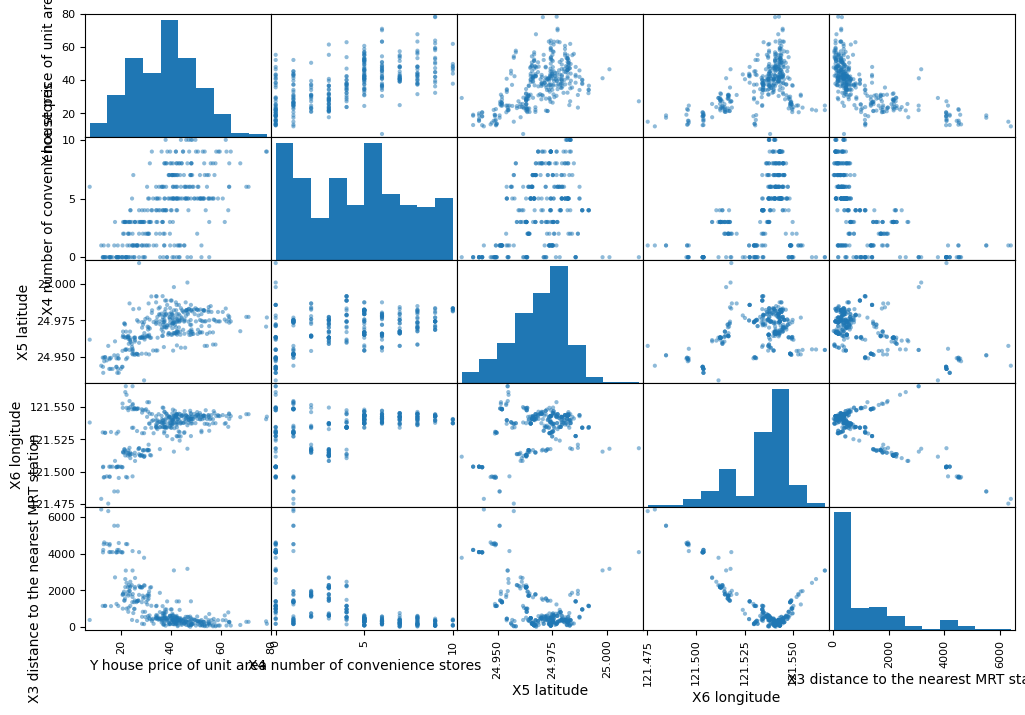

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["Y house price of unit area","X4 number of convenience stores", "X5 latitude", "X6 longitude","X3 distance to the nearest MRT station"]
scatter_matrix(housing[attributes], figsize = (12, 8))

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

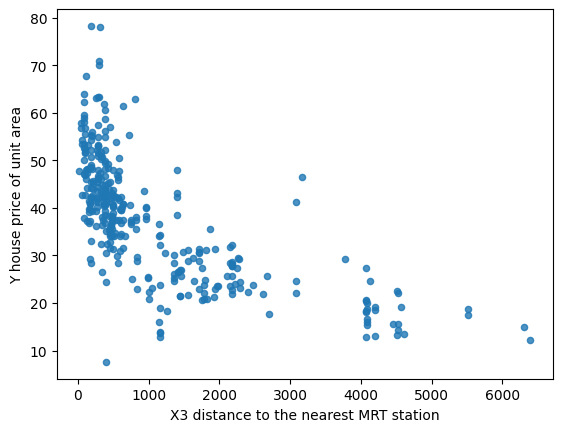

In [16]:
housing.plot(kind ="scatter", x="X3 distance to the nearest MRT station", y="Y house price of unit area", alpha = 0.8)

## Trying out Attribute combination

In [17]:
housing ["area"] = housing['X5 latitude']*housing['X6 longitude']

In [18]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,area
369,370,2012.667,20.2,2185.12800,3,24.96322,121.51237,22.8,3033.340025
360,361,2012.667,32.9,87.30222,10,24.98300,121.54022,47.1,3036.439316
180,181,2012.667,26.9,4449.27000,0,24.94898,121.49621,15.5,3031.206513
188,189,2012.917,34.8,190.03920,8,24.97707,121.54312,44.3,3035.791016
404,405,2013.333,16.4,289.32480,5,24.98203,121.54348,41.2,3036.402864


In [19]:
corr_matrix = housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending = False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.636209
area                                      0.629420
X5 latitude                               0.569626
X6 longitude                              0.535064
X1 transaction date                       0.054334
No                                       -0.022784
X2 house age                             -0.182001
X3 distance to the nearest MRT station   -0.692165
Name: Y house price of unit area, dtype: float64

<Axes: xlabel='area', ylabel='Y house price of unit area'>

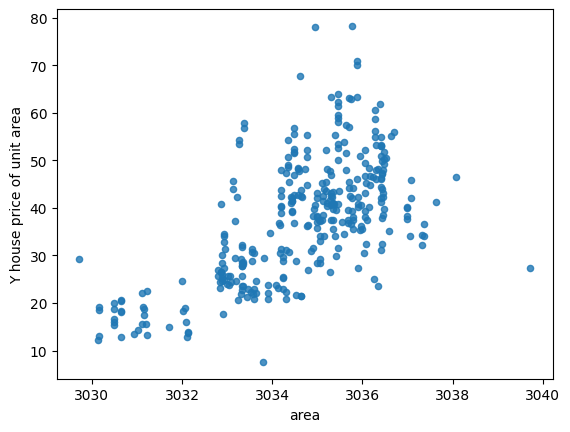

In [20]:
housing.plot(kind ="scatter", x="area", y="Y house price of unit area", alpha = 0.8)

In [21]:
housing = strat_train_set.drop("Y house price of unit area", axis =1)
housing_labels = strat_train_set["Y house price of unit area"].copy()


## Missing Attributes

In [22]:
# to take care of missing attributes , you have 3 options:
#     1.get rid of missing data points
#     2. get rid of whole attribute
#     3. set the value to 0, mean or median

In [23]:
#option 1.
a = housing.dropna(subset =["No"])
a.shape

(331, 7)

In [24]:
#option 2
housing.drop("No", axis = 1) 
housing.shape


(331, 7)

In [25]:
#option3
median=housing['No'].median()
housing['No'].fillna(median)

369    370
360    361
180    181
188    189
404    405
      ... 
10      11
381    382
159    160
141    142
292    293
Name: No, Length: 331, dtype: int64

In [26]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,1080.612966,4.102719,24.969250,121.533541
std,120.383667,0.280728,11.497031,1250.250085,2.944182,0.012326,0.015267
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.933630,121.475160
25%,103.500000,2012.917000,9.100000,289.324800,1.000000,24.963050,121.529675
50%,209.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538440
75%,311.500000,2013.417000,29.600000,1448.504000,6.000000,24.978045,121.543395
max,414.000000,2013.583000,43.800000,6396.283000,10.000000,25.014590,121.566270


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_.shape

(7,)

In [29]:
x =imputer.transform(housing)
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [30]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,1080.612966,4.102719,24.969250,121.533541
std,120.383667,0.280728,11.497031,1250.250085,2.944182,0.012326,0.015267
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.933630,121.475160
25%,103.500000,2012.917000,9.100000,289.324800,1.000000,24.963050,121.529675
50%,209.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538440
75%,311.500000,2013.417000,29.600000,1448.504000,6.000000,24.978045,121.543395
max,414.000000,2013.583000,43.800000,6396.283000,10.000000,25.014590,121.566270


## Scikit-learn Design

primarly, three types of objects:
1. Estimators - it estimate some parameters based on some dataset (eg. imputer)
it has fit method and transform method.
Fit method = fits the dataset and calculates the internal parameters
2. Transformer - transform method takes input and returns output based on the learning from fit(). it also has a convenience function called fit_transform() 
3. Predictors - linear regression is an example of predictor. fit() and predict() are two common funtion. it also give score funtion which will evalute the prediction

## feature scaling

two types of feature scaling primarly 2 types:
1. Min-Max scaling (normalizaton)
 (value - min)/(max-min) sklearn provides a class MInMaxScalar for this
2. Standardization
 (value - mean)/ std sklearn provides a class StandardScalar for this

## creating pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])


In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr.shape

(331, 7)

## Selecting a desired model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model= DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [35]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [36]:
model.predict(prepared_data)

array([24.165, 45.077, 15.374, 43.4  , 44.588])

In [37]:
list(some_labels)

[22.8, 47.1, 15.5, 44.3, 41.2]

## elvauating the model

In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [39]:
rmse

2.4812159856351883

## using better evaluation technique - cross validation

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [41]:
rmse_scores

array([4.85308385, 8.12036705, 4.48440473, 7.62141858, 9.05934456,
       5.2942089 , 6.22933908, 5.5592067 , 5.31571946, 9.00567896])

In [42]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:",  scores.mean())
    print("standard deviation:", scores.std())

In [43]:
print_scores(rmse_scores)

scores: [4.85308385 8.12036705 4.48440473 7.62141858 9.05934456 5.2942089
 6.22933908 5.5592067  5.31571946 9.00567896]
mean: 6.554277188268808
standard deviation: 1.6514278542756387


## saving the model

In [44]:
from joblib import dump, load
dump(model, 'dragon.joblib' )

['dragon.joblib']

## testing the model

In [45]:
x_test = strat_test_set.drop("Y house price of unit area", axis =1)
y_test = strat_test_set["Y house price of unit area"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions,list( y_test))

In [46]:
final_rmse

10.351495380593947

In [47]:
prepared_data[0]

array([ 1.33634919, -1.69732575,  0.18998546,  0.88477281, -0.37510886,
       -0.48993566, -1.38876478])

## using the model

In [48]:
from joblib import load, dump
import numpy as np
model = load( 'dragon.joblib')
features = np.array([[ 1.33634919, -1.69732575,  0.18998546,  0.88477281, -0.17510886,
       -0.48993566, -1.38876478]])
model.predict(features)

array([25.061])